# PART 1

Please write the codes for part 1 of the project here.

In [25]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
#Umutcan Deliduman 200200028
#Furkan Mat 200200030

In [26]:
headers={"User-Agent":"Chrome (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTM;L, like Gecko) Chrome/97.0.4692.71 Safari/537.36"}

In [27]:
listrollercoaster=[]
response = requests.get("https://rcdb.com/rhr.htm")
soup = BeautifulSoup(response.content,"html.parser")

toprollercoaster=soup.find_all(text =" mph")
for detail in toprollercoaster:
    name = detail.parent.parent.findNext('a').contents[0]
    speed = detail.findPrevious('td').contents[0].text
    rank = detail.parent.findPrevious('td').contents[0]
    place= detail.findNext('td').findNext('td').contents[0].text
    datetime= detail.findNext('td').findNext('td').findNext('td').find("time")["datetime"]
    link = detail.parent.parent.findNext(href=True).get("href")
    response =requests.get("https://rcdb.com"+link)
    soup=BeautifulSoup(response.content,"html.parser")
    detailpage=soup.find_all(text="Length")
    for x in detailpage:
        length=x.parent.findNext('td').contents[0].text
        height =x.findNext('td').findNext('td').contents[0].text
    listrollercoaster.append([rank,name,speed,place,datetime,length,height])
print(listrollercoaster)

excelfile =pd.DataFrame(listrollercoaster,columns=["Rank","Name","Speed","Place","Opened Date","Length","Height"])
excelfile.to_csv("Rollercoaster.csv",index=False)


[['1st', 'Formula Rossa', '149.1', 'Ferrari World Abu Dhabi', '2010-11-04', '6561.7', '170.6'], ['2nd', 'Kingda Ka', '128', 'Six Flags Great Adventure', '2005-05-21', '3118', '456'], ['*', 'Top Thrill Dragster', '120', 'Cedar Point', '2021-08', '2800', '420'], ['3rd', 'Red Force', '111.8', 'Ferrari Land', '2017-04-07', '2887.2', '367.3'], ['*', 'Do-Dodonpa', '111.8', 'Fuji-Q Highland', '2021-08-13', '4081.3', '160.8'], ['4th', 'Superman: Escape from Krypton', '100', 'Six Flags Magic Mountain', '2011-03-19', '1235', '1235'], ['*', 'Ring Racer', '99.4', 'Nürburgring', '2013-11-04', '3976.3', '123'], ['5th', 'Steel Dragon 2000', '95', 'Nagashima Spa Land', '2006-09-03', '8133.2', '318.3'], ['6th', 'Millennium Force', '93', 'Cedar Point', '2000-05-13', '6595', '310'], ['7th', 'Leviathan', '92', "Canada's Wonderland", '2012-05-06', '5486', '306'], ['8th', 'Orion', '91', 'Kings Island', '2020-07-02', '5321', '287'], ['9th', 'Intimidator 305', '90', 'Kings Dominion', '2010-04-02', '5100', '30

# PART 2
# Introduction

Since Jan. 1, 2015, The Washington Post has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. 

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [28]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [98]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [213]:
data = pd.read_csv('Share_of_Race_By_City.csv')
data

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [214]:
data.shape


shape = data.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])


DataFrame Shape : (29268, 7)

Number of rows : 29268

Number of columns : 7


In [215]:
for col in data.columns:
    print(col)

Geographic area
City
share_white
share_black
share_native_american
share_asian
share_hispanic


In [216]:
data.isna().values.any()


False

In [217]:
len(data[data.duplicated()])


0

## Data Cleaning - Check for Missing Values and Duplicates

If there are any NaN values find them and substitute 0 for those.

In [218]:
data.isna().values.any()


False

In [219]:
len(data[data.duplicated()])


0

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

Max Rate MS : 26.88425414364641
Min Rate NJ : 8.16091743119266


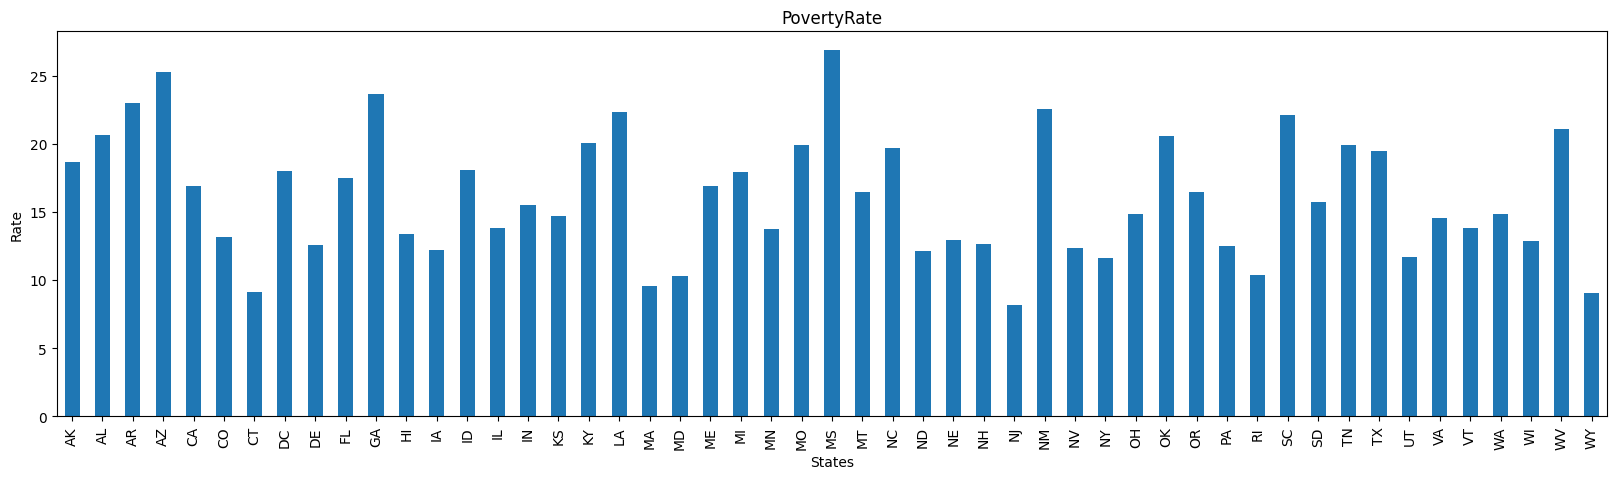

In [4]:
df_pct_poverty["poverty_rate"]=df_pct_poverty["poverty_rate"].replace("-","0.0").astype(float)
df1 = df_pct_poverty.groupby(['Geographic Area'])['poverty_rate'].mean()
df1.plot(kind='bar',title='PovertyRate',ylabel='Rate',xlabel='States',figsize=(20,5))
print("Max Rate",df1.idxmax(skipna=True),":", df1.max())
print("Min Rate",df1.idxmin(skipna=True),":",df1.min())
df1.to_excel("povertratebystates.xlsx")



# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

Max Rate MA : 92.02845528455285
Min Rate TX : 74.08694905552375


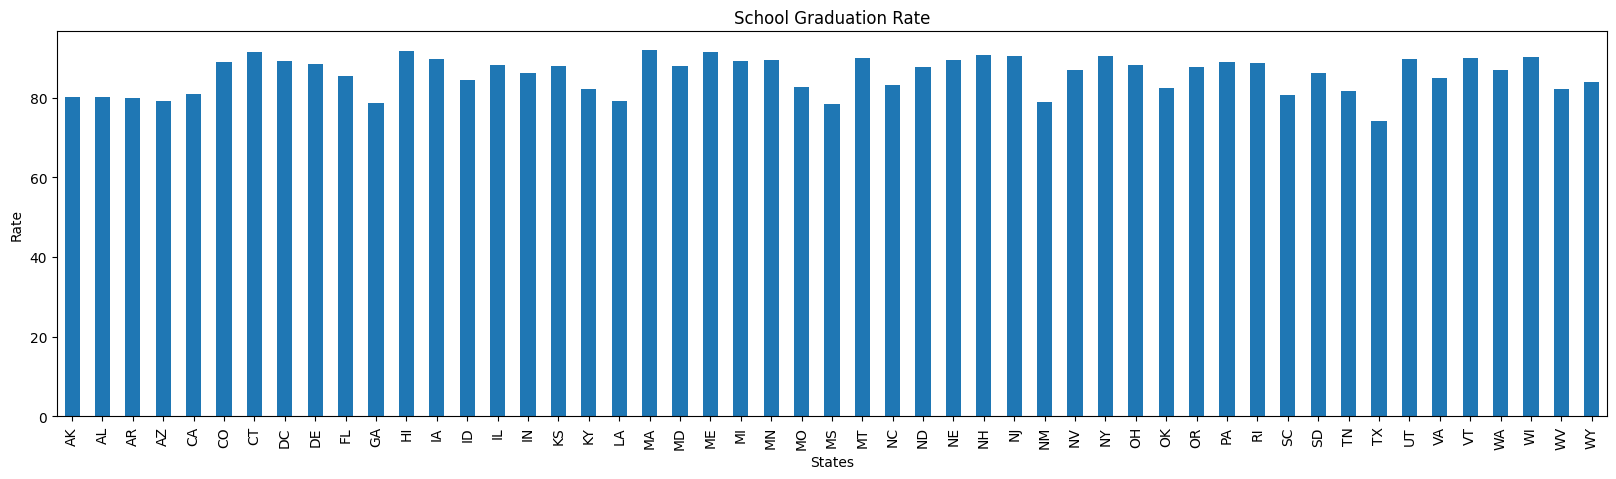

In [5]:
df_pct_completed_hs["percent_completed_hs"]=df_pct_completed_hs["percent_completed_hs"].replace("-","0.0").astype(float)
df2 = df_pct_completed_hs.groupby(['Geographic Area'])['percent_completed_hs'].mean()
df2.plot(kind='bar',title='School Graduation Rate',ylabel='Rate',xlabel='States',figsize=(20,5))
print("Max Rate",df2.idxmax(skipna=True),":", df2.max())
print("Min Rate",df2.idxmin(skipna=True),":",df2.min())
df2.to_excel("hsratebystates.xlsx")


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

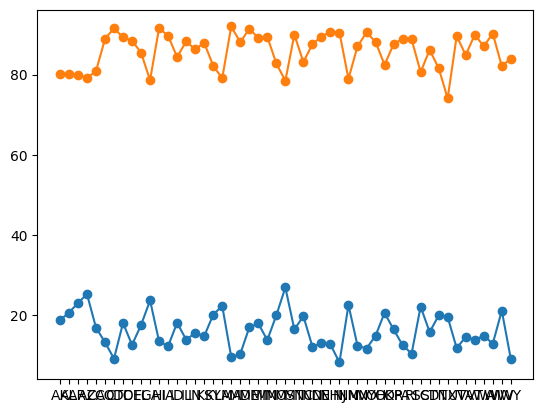

In [6]:
df1=pd.read_excel("povertratebystates.xlsx")
df2=pd.read_excel("hsratebystates.xlsx")
geographicarea1 = df1["Geographic Area"]
geographicarea2 = df2["Geographic Area"]
poverty_rate =df1["poverty_rate"]
hsrate=df2["percent_completed_hs"]
#Blue Line is Poverty Rate Orange line is percentage of high school completed
fig,ax=plt.subplots()
plt.rcParams["figure.figsize"]=(20,5)
ax.plot(geographicarea1, poverty_rate, marker="o")
ax.plot(geographicarea2, hsrate, marker="o")
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

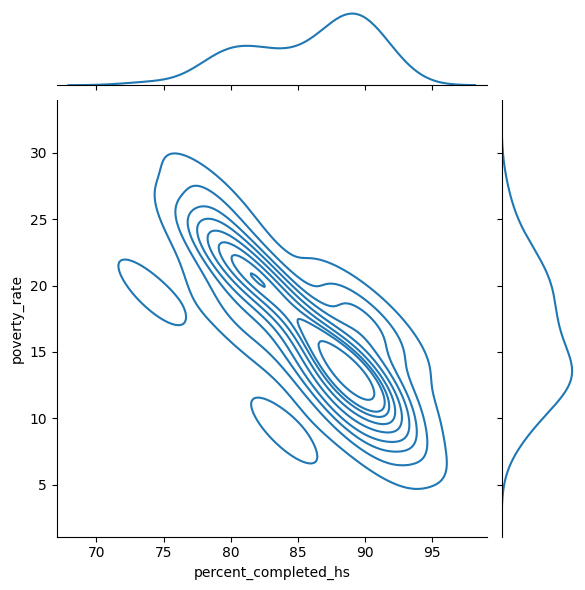

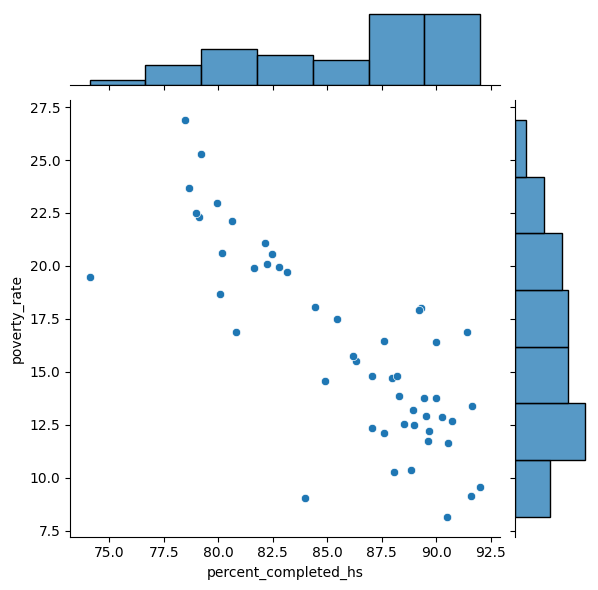

In [7]:
kde=sns.jointplot(x=df2["percent_completed_hs"],y=df1["poverty_rate"],data=df1,
kind='kde')
g=sns.jointplot(x=df2["percent_completed_hs"],y=df1["poverty_rate"],data=df1)

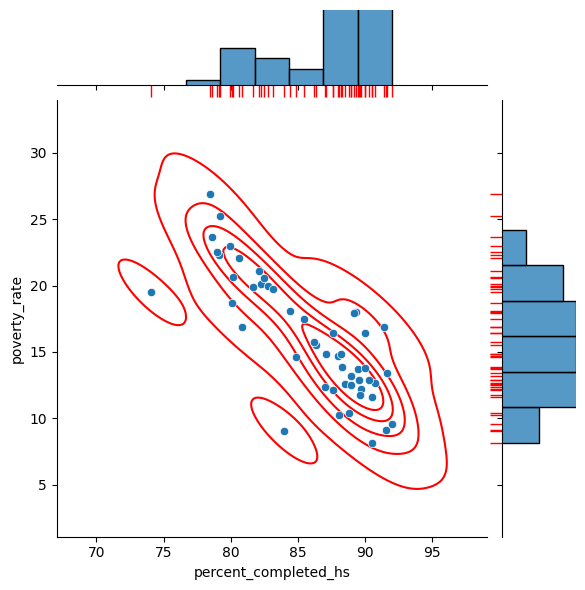

In [8]:
g=sns.jointplot(x=df2["percent_completed_hs"],y=df1["poverty_rate"],data=df1)
g.plot_joint(sns.kdeplot,color="r",zorder=0,levels=6)
g.plot_marginals(sns.rugplot,color="r",height=-.15,clip_on=False)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

<AxesSubplot: xlabel='percent_completed_hs', ylabel='poverty_rate'>

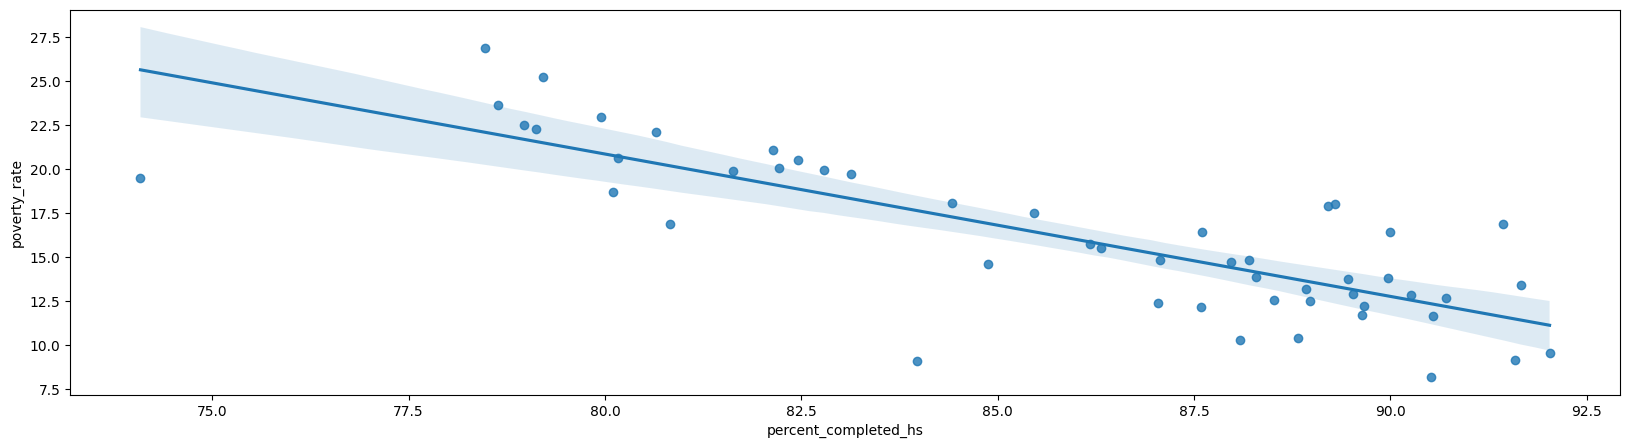

In [9]:
sns.regplot(x=df2["percent_completed_hs"],y=df1["poverty_rate"])

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the the white, black, hispanic, asian and native american population in each US State using a bar chart.

In [10]:
df_share_race_city['share_white']=df_share_race_city['share_white'].replace("(X)","0").astype(float)
df_share_race_city['share_black']=df_share_race_city['share_black'].replace("(X)","0").astype(float)
df_share_race_city['share_native_american']=df_share_race_city['share_native_american'].replace("(X)","0").astype(float)
df_share_race_city['share_asian']=df_share_race_city['share_asian'].replace("(X)","0").astype(float)
df_share_race_city['share_hispanic']=df_share_race_city['share_hispanic'].replace("(X)","0").astype(float)
df3=df_share_race_city.groupby('Geographic area')['share_white','share_black','share_native_american','share_asian','share_hispanic'].sum()
print(df3)

                 share_white  share_black  share_native_american  share_asian  \
Geographic area                                                                 
AK                 16,068.80       199.70              16,144.40       488.70   
AL                 41,909.20    13,480.30                 381.10       277.30   
AR                 42,441.20     8,816.60                 411.10       258.10   
AZ                 27,028.00       430.50              12,894.00       327.70   
CA                108,949.30     4,081.10               2,612.20     8,441.40   
CO                 40,197.90       420.30                 744.20       528.90   
CT                 12,313.10       713.90                  93.90       427.50   
DC                     38.50        50.70                   0.30         3.50   
DE                  5,794.70     1,169.90                  39.80       152.00   
FL                 72,378.70    12,301.20                 419.00     1,487.40   
GA                 39,182.30

C:\Users\Cann\AppData\Local\Temp\ipykernel_2756\413390890.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3=df_share_race_city.groupby('Geographic area')['share_white','share_black','share_native_american','share_asian','share_hispanic'].sum()


<AxesSubplot: title={'center': 'Race'}, xlabel='Race', ylabel='Count'>

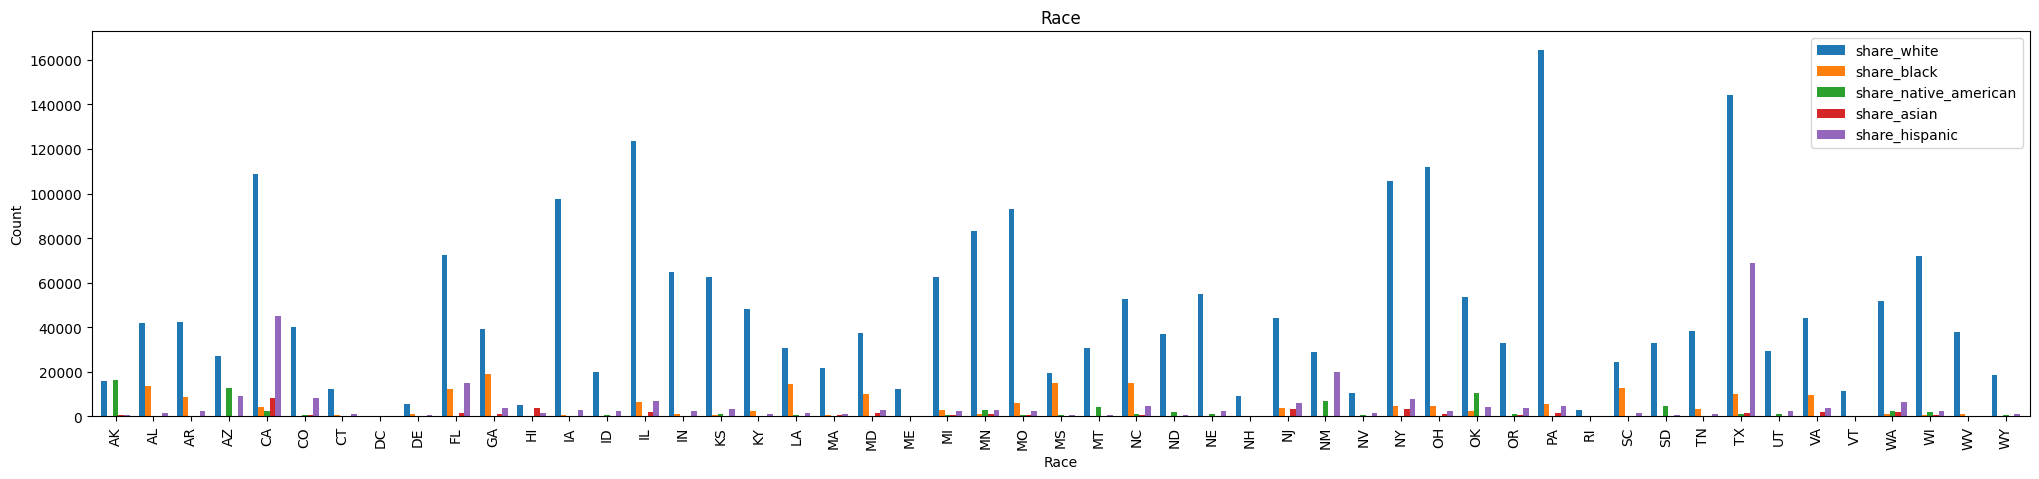

In [11]:
df3.plot(kind='bar',title='Race',ylabel='Count',xlabel='Race',figsize=(25,5),width=0.75)

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64


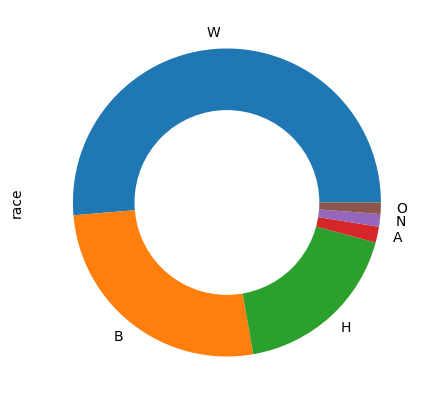

In [40]:

race = df_fatalities["race"].value_counts()
print(race)
race.plot.pie()
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

M    2428
F     107
Name: gender, dtype: int64


<AxesSubplot: xlabel='Gender', ylabel='Count'>

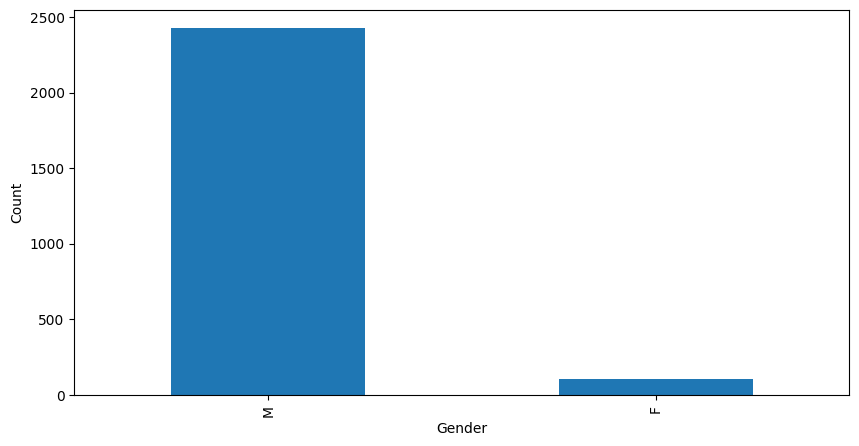

In [49]:
df4=df_fatalities["gender"].value_counts()
print(df4)
df4.plot.bar(figsize=(10,5),xlabel="Gender",ylabel="Count")

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

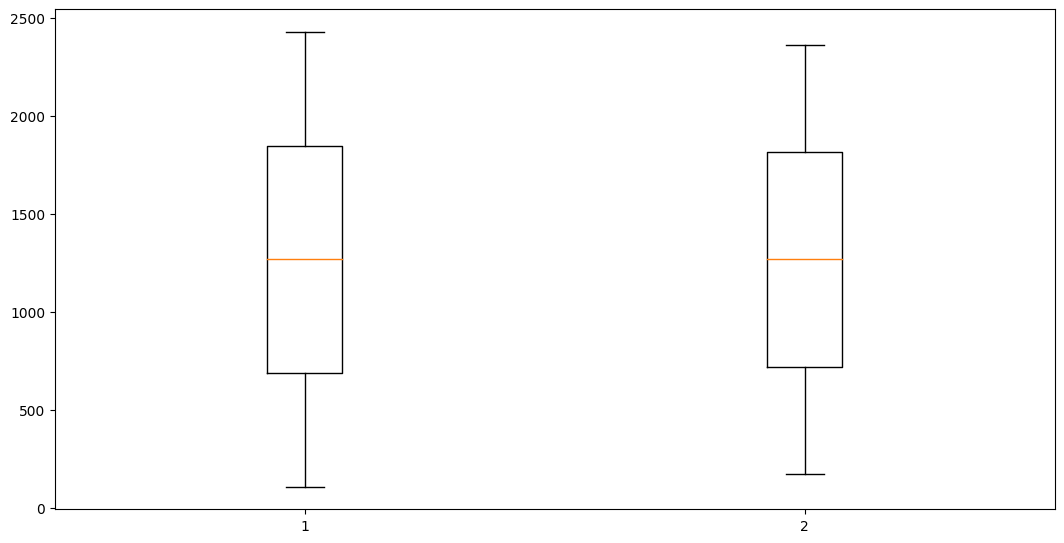

In [102]:
df4=df_fatalities["gender"].value_counts()
manner = df_fatalities["manner_of_death"].value_counts()

data=[df4,manner]
fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
bp=ax.boxplot(data)
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

Percentage of unarmed people killed:% 6.7695961995249405


<AxesSubplot: >

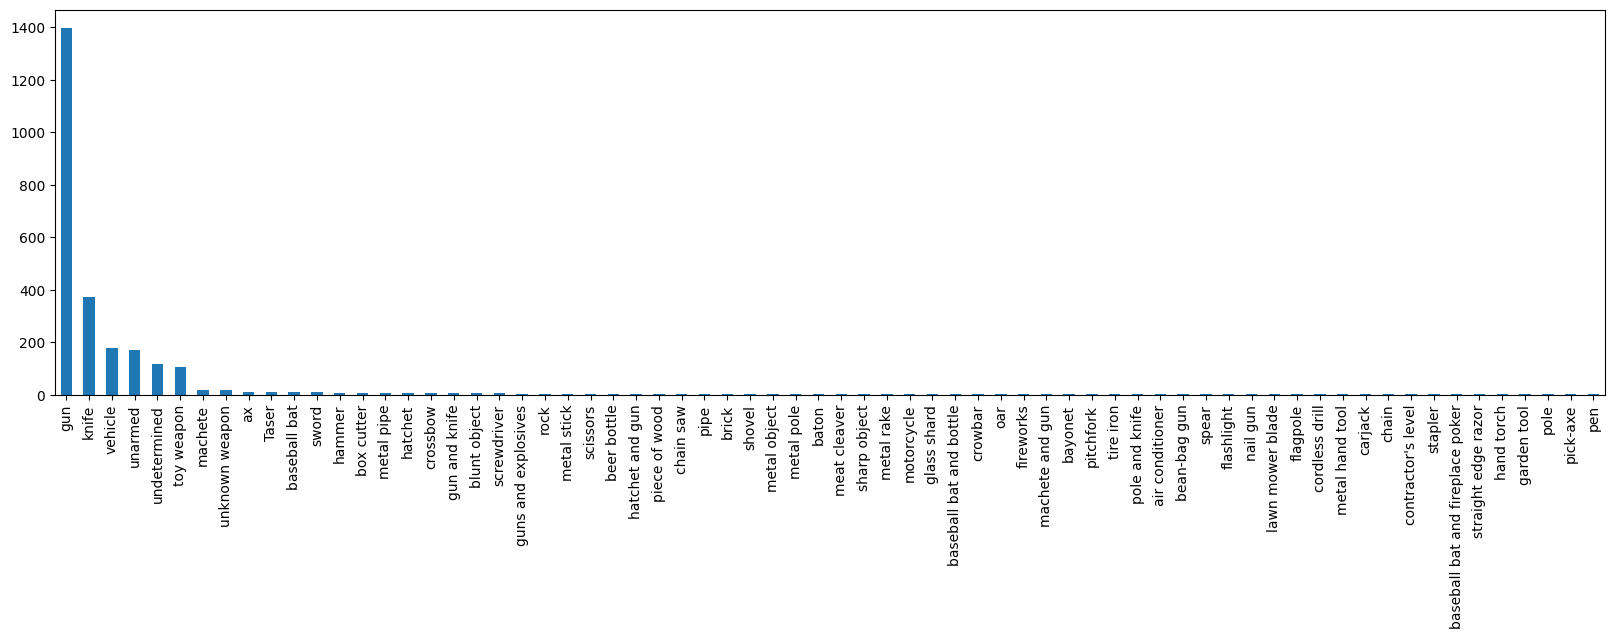

In [14]:
unarmedcount=df_fatalities.armed.value_counts()['unarmed']
total=df_fatalities.armed.value_counts().sum()
percentage= unarmedcount/total*100
print("Percentage of unarmed people killed:%",percentage)

x=df_fatalities.armed.value_counts()
x.plot.bar(figsize=(20,5))

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [19]:
age= df_fatalities[df_fatalities.age < 25]
len(age)/len(df_fatalities)*100

17.75147928994083

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

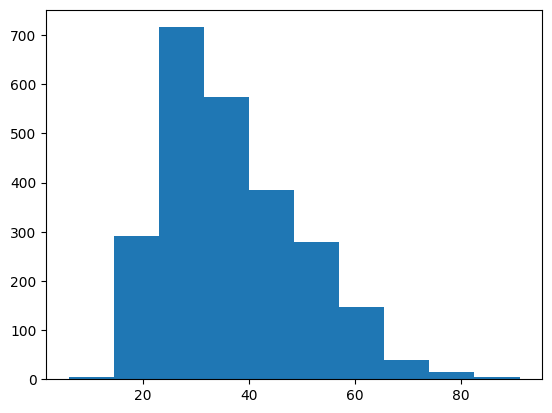

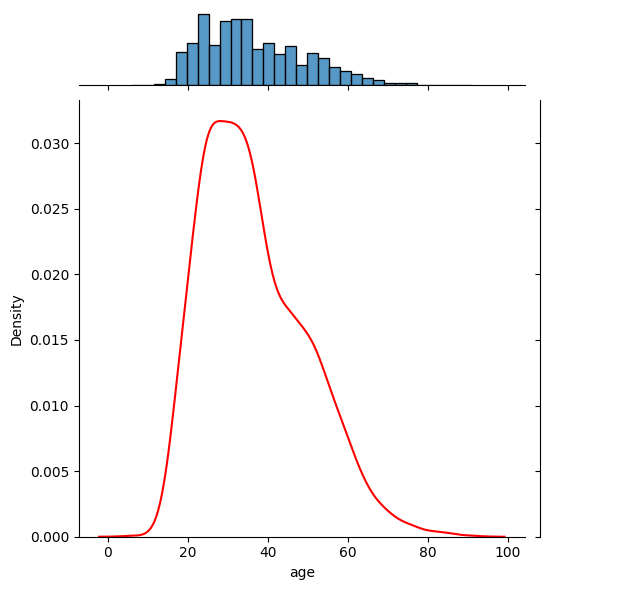

In [28]:
killedage=df_fatalities.age
plt.hist(killedage)
g=sns.jointplot(x=killedage,data=df_fatalities)
g.plot_joint(sns.kdeplot,color="r",zorder=0,levels=6)

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

  race  counts
0    A      39
1    B     618
2    H     423
3    N      31
4    O      28
5    W    1201


<AxesSubplot: ylabel='Density'>

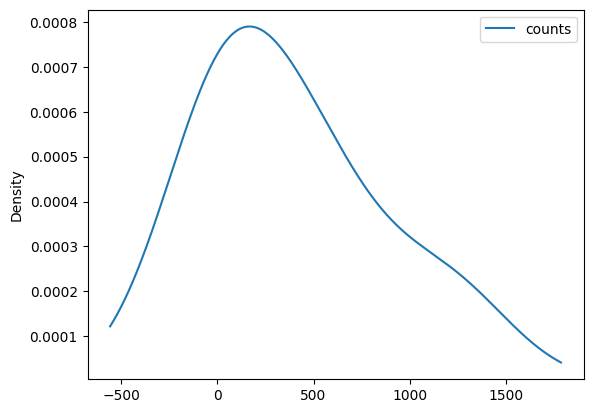

In [66]:
racecount=df_fatalities.groupby('race')['race'].size().reset_index(name='counts')
print(racecount)
racecount.plot.kde()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

<AxesSubplot: xlabel='race,race'>

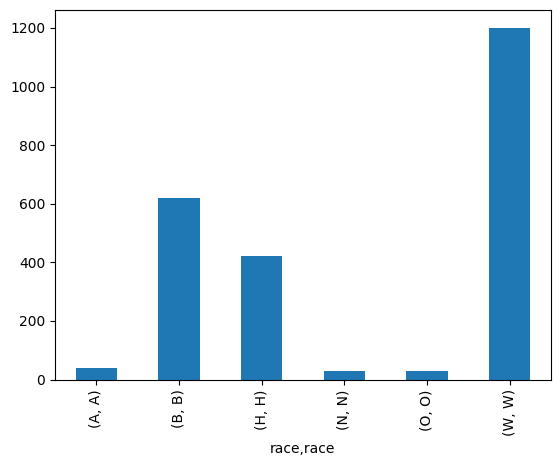

In [71]:
df4=df_fatalities.groupby('race')['race'].value_counts()
df4.plot.bar()


# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [87]:
mentallillness=df_fatalities['signs_of_mental_illness'].value_counts()[True]
percentageofilness=(mentallillness/len(df_fatalities['signs_of_mental_illness']))*100
print(percentageofilness)


24.970414201183434


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

<AxesSubplot: xlabel='city,city'>

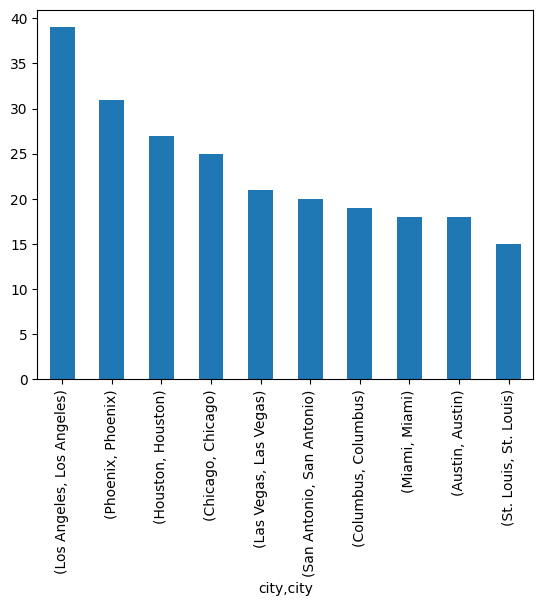

In [93]:
df4=df_fatalities.groupby('city')['city'].value_counts()
df4=df4.sort_values(ascending=False).head(10)
df4.plot.bar()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [200]:
losangeles=df_fatalities.groupby('city')['race'].value_counts()['Los Angeles']
losangeles=losangeles.sort_values(ascending=False)
print(losangeles)
houston=df_fatalities.groupby('city')['race'].value_counts()['Houston']
houston=houston.sort_values(ascending=False)
print(houston)
chicago=df_fatalities.groupby('city')['race'].value_counts()['Chicago']
chicago=chicago.sort_values(ascending=False)
print(chicago)
lasvegas=df_fatalities.groupby('city')['race'].value_counts()['Las Vegas']
lasvegas=lasvegas.sort_values(ascending=False)
print(lasvegas)
sanantonio=df_fatalities.groupby('city')['race'].value_counts()['San Antonio']
sanantonio=sanantonio.sort_values(ascending=False)
print(sanantonio)
columbus=df_fatalities.groupby('city')['race'].value_counts()['Columbus']
columbus=columbus.sort_values(ascending=False)
print(columbus)
miami=df_fatalities.groupby('city')['race'].value_counts()['Miami']
miami=miami.sort_values(ascending=False)
print(miami)
austin=df_fatalities.groupby('city')['race'].value_counts()['Austin']
austin=austin.sort_values(ascending=False)
print(austin)
louis=df_fatalities.groupby('city')['race'].value_counts()['St. Louis']
louis=louis.sort_values(ascending=False)
print(louis)
phoenix=df_fatalities.groupby('city')['race'].value_counts()['Phoenix']
phoenix=phoenix.sort_values(ascending=False)
print(phoenix)


race
H    19
B    10
W     6
A     1
Name: race, dtype: int64
race
B    15
H     6
W     3
A     1
N     1
Name: race, dtype: int64
race
B    21
W     2
H     1
Name: race, dtype: int64
race
W    9
H    5
B    3
Name: race, dtype: int64
race
H    12
B     3
W     3
Name: race, dtype: int64
race
B    11
W     6
O     1
Name: race, dtype: int64
race
B    8
H    6
W    3
Name: race, dtype: int64
race
W    13
B     3
H     2
Name: race, dtype: int64
race
B    11
W     3
Name: race, dtype: int64
race
W    12
H    11
N     3
B     2
Name: race, dtype: int64


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

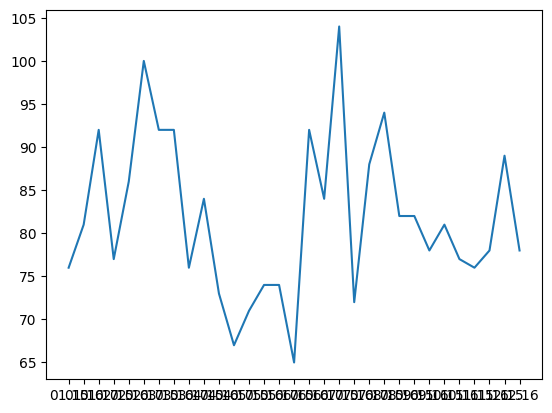

In [90]:
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")
df_fatalities["date"]=df_fatalities["date"].str[3:9]
df_fatalities["date"]=df_fatalities["date"].str.replace("/",".",1)
deneme=df_fatalities.groupby('date')['gender'].count().reset_index(name="count")
plt.plot(deneme["date"],deneme["count"])

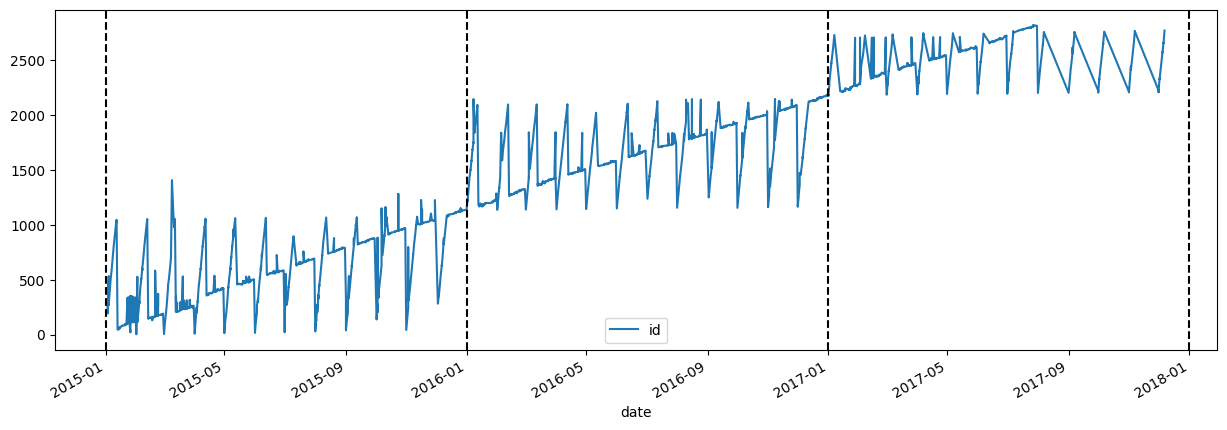

In [99]:
df_fatalities.to_excel("Deaths_by_Police_US.csv.xlsx")

data_orig = pd.read_excel('Deaths_by_Police_US.csv.xlsx')

data_orig['date'] = pd.to_datetime(data_orig['date']) 
ax = data_orig.plot(x='date', y='id', figsize=(15,5))

xcoords = ['2015-01-01', '2016-01-01','2017-01-01', '2018-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

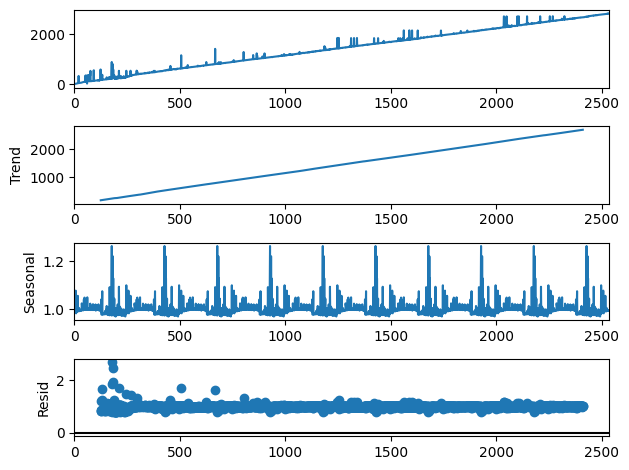

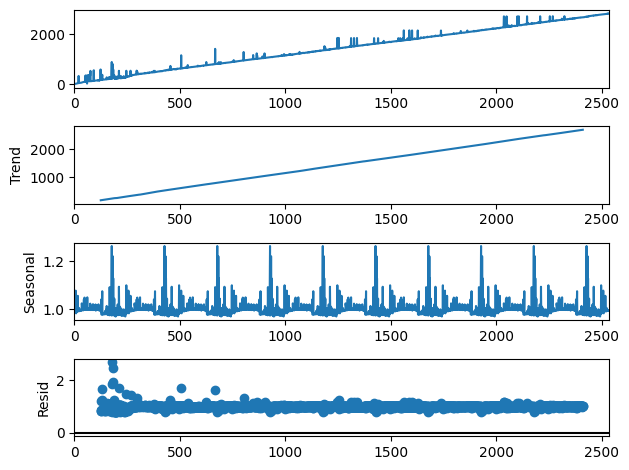

In [100]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)

data_orig.set_index('date')

anlys = data_orig[['id']].copy()


decomposed = sm.tsa.seasonal_decompose(anlys, period=250, model="multiplicative")

trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

decomposed.plot()